In [1]:
import pandas as pd
import numpy as np
import json
import requests
import plotly
import plotly.graph_objs as go
import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df = pd.read_csv("datasets/OxCGRT_latest.csv")
deaths = pd.read_csv("datasets/deaths_by_day.csv")

In [2]:
data = []
for index, row in df.iterrows():
    tmp_row = str(row['CountryName'])
    info = tmp_row.split(",")
    tmp = info[:-1]
    data.append(tmp)

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/OxCGRT_latest.csv")
data = []
for index, row in df.iterrows():
    tmp_row = str(row['CountryName'])
    info = tmp_row.split(",")
    tmp = info[:-1]
    data.append(tmp)
df2 = pd.DataFrame(data, columns = ['CountryName', 'CountryCode', 'Date', 'StringencyIndex']) 
df2.drop(df2.tail(1).index,inplace=True) 
df2["StringencyIndex"] = pd.to_numeric(df2["StringencyIndex"])
#Attempt to get how you wanted with two indexes.. A bit unsure what you mean
df3 = df2
df3.set_index(['CountryCode', 'Date'] )
df4 = df2
#for index, row in df4.iterrows():
#     print(row['Date'])
dates = df4['Date'].unique()
df5 = pd.DataFrame(columns = dates) 
df5['CountryCode'] = df2['CountryCode'].unique()
df6 = df5.set_index(['CountryCode'])

for i in range(150): #151 countries
    tmp = np.asarray(df2['StringencyIndex'].iloc[i*115:115+115*i])
    df6.iloc[i,:] =tmp
    
df6

,1/01/2020,2/01/2020,3/01/2020,4/01/2020,5/01/2020,6/01/2020,7/01/2020,8/01/2020,9/01/2020,10/01/2020,...,15/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,21/04/2020,22/04/2020,23/04/2020,24/04/2020
CountryCode,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,0,0,0,0,0,0,0,0,...,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71
AFG,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
AGO,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
ALB,0,0,0,0,0,0,0,0,0,0,...,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71
AND,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAF,100,100,100,100,100,100,100,100,100,100,...,23.81,23.81,23.81,23.81,23.81,23.81,23.81,38.1,38.1,38.1
ZMB,38.1,38.1,38.1,38.1,38.1,38.1,47.62,47.62,47.62,47.62,...,0,0,0,0,28.57,28.57,28.57,28.57,28.57,28.57
ZWE,52.38,66.67,66.67,66.67,66.67,66.67,66.67,100,100,100,...,33.33,33.33,42.86,42.86,42.86,42.86,47.62,47.62,47.62,47.62


In [64]:
#Attempt to get how you wanted with two indexes.. A bit unsure what you mean
df3 = df2
df3.set_index(['CountryCode', 'Date'] )
df2

#List of country code names
code_list = np.asarray(df2['CountryCode'].unique())
print(code_list)


['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BWA'
 'CAN' 'CHE' 'CHL' 'CHN' 'CMR' 'COD' 'COL' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE'
 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GHA' 'GMB' 'GRC' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KOR' 'KWT' 'LAO' 'LBN' 'LBY' 'LKA' 'LSO' 'LUX'
 'MAC' 'MAR' 'MDA' 'MDG' 'MEX' 'MLI' 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI'
 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NZL' 'OMN' 'PAK' 'PAN' 'PER'
 'PHL' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU'
 'SDN' 'SGP' 'SLE' 'SLV' 'SMR' 'SRB' 'SSD' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC'
 'SYR' 'TCD' 'THA' 'TTO' 'TUN' 'TUR' 'TZA' 'UGA' 'UKR' 'URY' 'USA' 'UZB'
 'VEN' 'VNM' 'ZAF' 'ZMB' 'ZWE' 'TWN' 'RKS']


In [16]:
df4 = df2
#for index, row in df4.iterrows():
#     print(row['Date'])
dates = df4['Date'].unique()
df5 = pd.DataFrame(columns = dates) 

,1/01/2020,2/01/2020,3/01/2020,4/01/2020,5/01/2020,6/01/2020,7/01/2020,8/01/2020,9/01/2020,10/01/2020,...,15/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,21/04/2020,22/04/2020,23/04/2020,24/04/2020


In [63]:
df5['CountryCode'] = df2['CountryCode'].unique()
df6 = df5.set_index(['CountryCode'])


['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BWA'
 'CAN' 'CHE' 'CHL' 'CHN' 'CMR' 'COD' 'COL' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE'
 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GHA' 'GMB' 'GRC' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KOR' 'KWT' 'LAO' 'LBN' 'LBY' 'LKA' 'LSO' 'LUX'
 'MAC' 'MAR' 'MDA' 'MDG' 'MEX' 'MLI' 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI'
 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NZL' 'OMN' 'PAK' 'PAN' 'PER'
 'PHL' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU'
 'SDN' 'SGP' 'SLE' 'SLV' 'SMR' 'SRB' 'SSD' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC'
 'SYR' 'TCD' 'THA' 'TTO' 'TUN' 'TUR' 'TZA' 'UGA' 'UKR' 'URY' 'USA' 'UZB'
 'VEN' 'VNM' 'ZAF' 'ZMB' 'ZWE' 'TWN' 'RKS']


In [29]:
for i in range(150): #151 countries
    tmp = np.asarray(df2['StringencyIndex'].iloc[i*115:115+115*i])
    df6.iloc[i,:] =tmp
    df5.iloc[i,:-1] = tmp

In [206]:
df6 #Hopefully what you are looking for. it fucks up the last country because of the stupid for loop above.

,1/01/2020,2/01/2020,3/01/2020,4/01/2020,5/01/2020,6/01/2020,7/01/2020,8/01/2020,9/01/2020,10/01/2020,...,15/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,21/04/2020,22/04/2020,23/04/2020,24/04/2020
CountryCode,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,0,0,0,0,0,0,0,0,...,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71
AFG,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
AGO,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
ALB,0,0,0,0,0,0,0,0,0,0,...,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71,85.71
AND,0,0,0,0,0,0,0,0,0,0,...,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43,71.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAF,100,100,100,100,100,100,100,100,100,100,...,23.81,23.81,23.81,23.81,23.81,23.81,23.81,38.1,38.1,38.1
ZMB,38.1,38.1,38.1,38.1,38.1,38.1,47.62,47.62,47.62,47.62,...,0,0,0,0,28.57,28.57,28.57,28.57,28.57,28.57
ZWE,52.38,66.67,66.67,66.67,66.67,66.67,66.67,100,100,100,...,33.33,33.33,42.86,42.86,42.86,42.86,47.62,47.62,47.62,47.62


In [83]:
scale = [[0, '#ffffff'],[1./100, '#f5ffa0'], 
       [1./1000, '#ffe98f'],[1./10000, '#ffc277'],[1./100000, '#ff8383']] 

colorscale= [
        [0, '#ffffff'],        #0
        [0.2, '#c3ffc1'], #10
        [0.4, '#f5ffa0'],  #100
        [0.6, '#ffe98f'],   #1000
        [0.8, '#ffc277'], #10000
        [1., '#ff8383']]


#tmp = deaths.loc[deaths['country_code'] == code_list[i+2]]
#tmp
#deaths['text'] = tmp[col]


,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,11.0,15.0,15.0,16.0,17.0,20.0,20.0,21.0


In [92]:
deaths["1/22/20"] = pd.to_datetime(deaths["1/22/20"]).deaths.strftime('%Y-%m-%d')
deaths

AttributeError: 'Series' object has no attribute 'deaths'

115


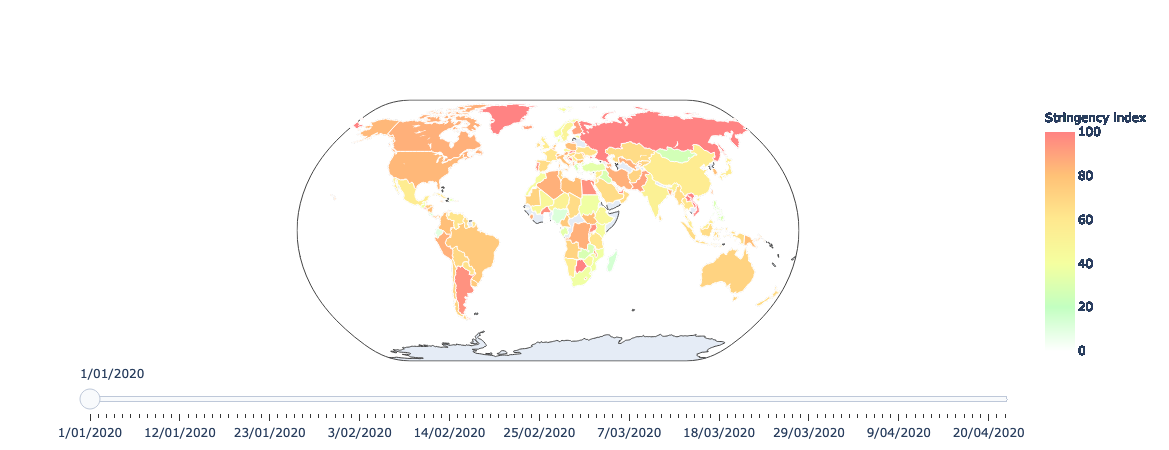

In [86]:
df = df6
data_slider = []
i=1
print(len(df.columns))
for col in df.columns: 
    #df[col] = df[col].astype(str)
    if(i==len(df.columns)-1):
        break
### Hovertext
    #tmp = deaths.loc[deaths['country_code'] == code_list[i+2]]
    #deaths['text'] = tmp[col]
    
    #df['text'] = df['country_code']

    
    data =  dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df5['CountryCode'],
        z = df5.iloc[:,i].astype(float), # colorcode variable
        zmax = 100,
        zmin = 0,
        locationmode = 'ISO-3',
        #text = deaths['text'], # hover text
        marker = dict( 
                    line = dict(
                              color = 'rgb(255,255,255)', 
                              width = 1)),               
        colorbar = dict(
                    title = "Stringency index")
    )
    i=i+1
    data_slider.append(data)  # add the dictionary to the list of dictionaries for the slider
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label= format(dates[i])) # label to be displayed for each step day
    step['args'][1][i] = True
    steps.append(step)
    



#'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

layout = dict(
        geo = dict(
            projection={'type':'natural earth' }),
            sliders=sliders)

# I create the figure object:

fig = dict(data=data_slider, layout=layout) 



# to plot in the notebook
plotly.offline.iplot(fig)


#offline.plot(fig, auto_open=True, image_filename="Covid-overview" ,image_width=2000, image_height=1000, 
              #filename='/Users/Sterri/Desktop/Visi/Covid-overveiw.html', validate=True)


